In [10]:
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Extract and Load (Task Hint 1)
with zipfile.ZipFile('archive (4).zip', 'r') as zip_ref:
    zip_ref.extractall('.')

df = pd.read_csv('bank-full.csv', sep=';')

# Step 2: Data Cleaning (Task Hint 2)
# Replace 'unknown' with NaN and drop them to clean the data
df.replace('unknown', pd.NA, inplace=True)
df.dropna(inplace=True)

# Step 3: Encoding Categorical Features (Task Hint 3)
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

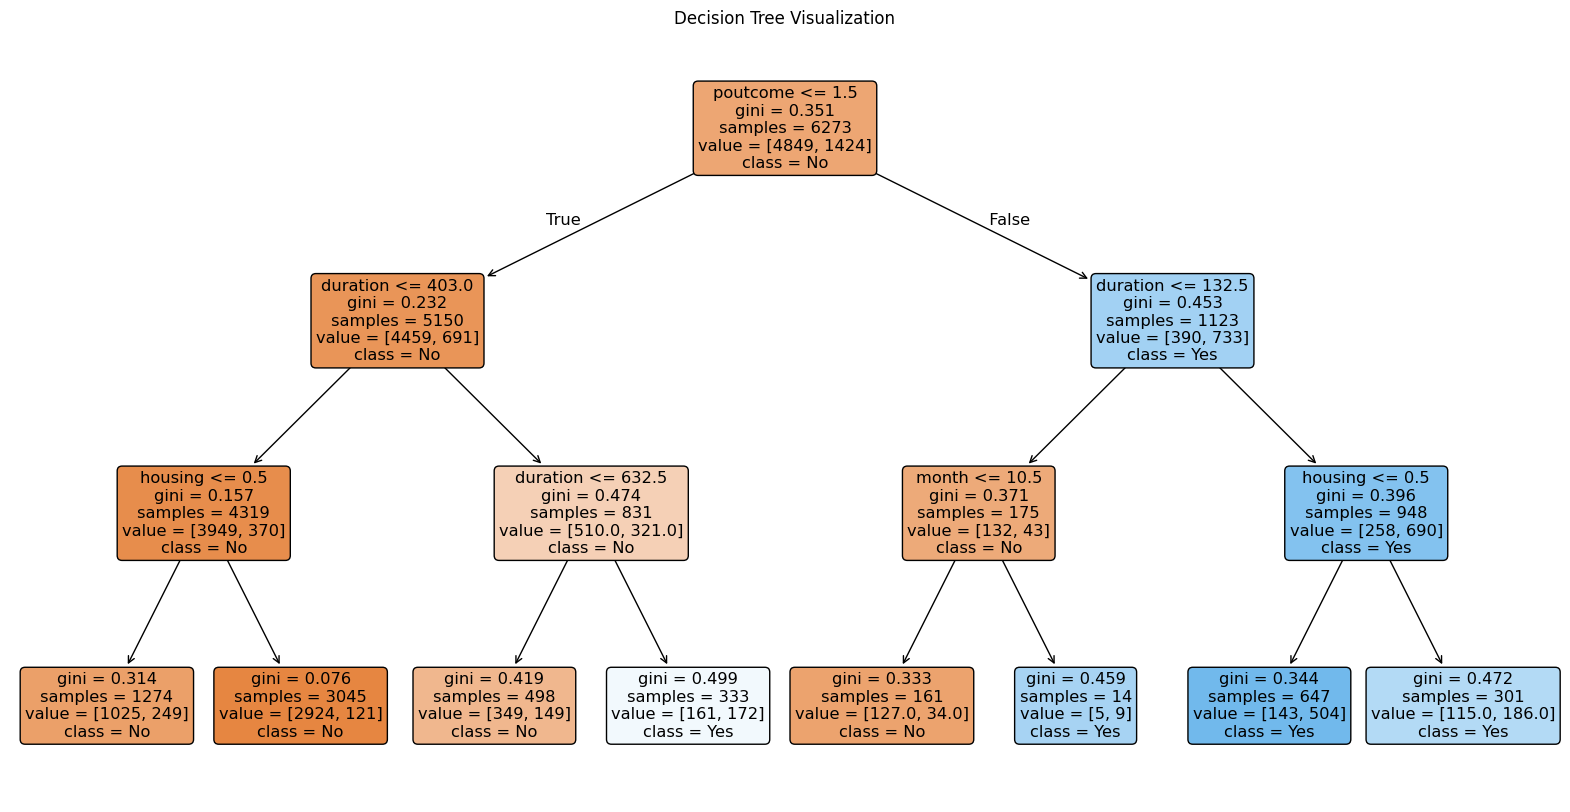

In [11]:
# Step 4: Split data (Task Hint 4)
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Classifier (Task Hint 5)
# Limiting max_depth to 3 to keep it interpretable and avoid overfitting
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Visualize (Task Hint 6)
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [12]:
# Step 7: Prediction and Report (Task Hint 7)
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Overfitting Check (Task Hint 8)
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1207
           1       0.67      0.58      0.62       362

    accuracy                           0.84      1569
   macro avg       0.78      0.75      0.76      1569
weighted avg       0.83      0.84      0.83      1569

Train Accuracy: 0.8443
Test Accuracy: 0.8381
